In [2]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3,7)

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Make sure that optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

In [4]:
img = cv.imread('butterfly.jfif')
# define identity kernel
kernel = np.zeros((3, 3), dtype = np.uint8)
kernel[1, 1] = 1

identity = cv.filter2D(img, -1, kernel)

cv.imshow('original', img)
cv.imshow('Identity', identity)

cv.waitKey(0)
cv.destroyAllWindows()


In [7]:
img = cv.imread('C:/Users/User/image processing/images/opencv_logo.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)    # because we are displaying using matplotlib module

kernel = np.ones((5,5), np.float32)/25
dst = cv.filter2D(img, -1, kernel)   # ddepth = -1 means that the processed image will have the same depth as the sources

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

blur = cv.blur(img, (5,5))

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [8]:
img = cv.imread('lena.jpg')

kernel_size = 5
#blur(average)
b_average = cv.blur(img, (kernel_size, kernel_size))

blur_gaussian = cv.GaussianBlur(img, (kernel_size, kernel_size), 0)

blur_median = cv.medianBlur(img, kernel_size)

cv.imshow("ori", img)
cv.imshow("average", b_average)
cv.imshow("gaussian", blur_gaussian)
cv.imshow("median", blur_median)
cv.waitKey(0)
cv.destroyAllWindows

<function destroyAllWindows>

In [16]:
kernel = np.array([[0, -1, 0],
                  [-1, 5, -1],
                  [0, -1, 0]])

img = cv.imread('butterfly.jfif')
sharp_img = cv.filter2D(img, -1, kernel)

cv.imshow('original', img)
cv.imshow('sharpening', sharp_img)

cv.waitKey(0)
cv.destroyAllWindows()

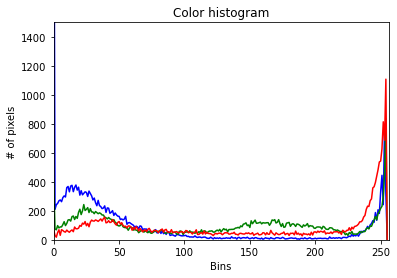

In [19]:
# Color histogram
channels = cv.split(img)
colors = 'b', 'g', 'r'

plt.figure()
plt.title('Color histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

for (channel, color) in zip(channels, colors):
    hist = cv.calcHist([channel], [0], None, [256], [0, 255])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
    plt.ylim([0, 1500])

plt.show()

In [22]:
##image thresholding
#create a custom 2D array

img = np.fromfunction(lambda i, j:j, (50, 256), dtype = 'uint8')

modes = (cv.THRESH_BINARY, 
        cv.THRESH_BINARY_INV,
        cv.THRESH_TRUNC,
        cv.THRESH_TOZERO,
        cv.THRESH_TOZERO_INV)

def trackbar(x):
    ret, img1 = cv.threshold(img, x, 255, cv.THRESH_BINARY) #binary color
    ret, img2 = cv.threshold(img, x, 255, cv.THRESH_BINARY_INV) #inverse of binary color
    ret, img3 = cv.threshold(img, x, 255, cv.THRESH_TRUNC) #pixel windows separator
    ret, img4 = cv.threshold(img, x, 255, cv.THRESH_TOZERO)
    ret, img5 = cv.threshold(img, x, 255, cv.THRESH_TOZERO_INV)
    
    cv.imshow('window', np.vstack([img1, img2, img3, img4, img5]))

# cv.imshow('window', img)
trackbar(100)
cv.createTrackbar('threshold', 'window', 100, 255, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

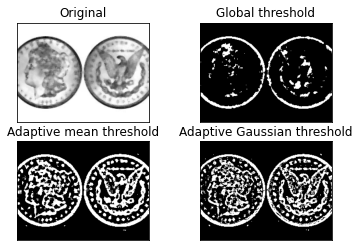

In [23]:
img = cv.imread('coins.jfif', 0)  # 0 means grayscale
img = cv.medianBlur(img, 5)
ret, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,
                          cv.THRESH_BINARY_INV, 11, 2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                          cv.THRESH_BINARY_INV, 11, 2)

titles = ['Original', 'Global threshold', 'Adaptive mean threshold',
         'Adaptive Gaussian threshold']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

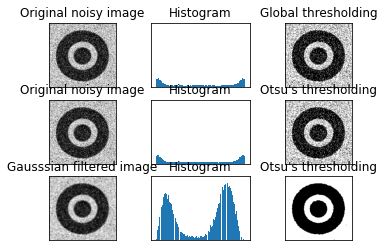

In [25]:
img = cv.imread('noisy.jfif', 0)   # 0 means grayscale

# global threshold
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

# Otsu's threshold
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# Otsu's threshold after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)   # the third argument here is standard deviation
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

# Plot grayscale images, their histogram and the resulting thresholded images
images = [img, 0, th1,
         img, 0, th2,
         blur, 0, th3]
titles = ['Original noisy image', 'Histogram', 'Global thresholding',
         'Original noisy image', 'Histogram', "Otsu's thresholding",
         'Gausssian filtered image', 'Histogram', "Otsu's thresholding"]

for i in range(3):
    plt.subplot(3, 3, i*3+1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])

In [27]:
img = cv.imread('noisy.jfif', 0)

blur = cv.GaussianBlur(img, (5, 5), 0)
_, img_binary = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# save in directory
kernel = np.ones((5,5), np.uint8)
erosion = cv.erode(img_binary, kernel, iterations = 1)

combined_images = np.hstack((img_binary, erosion))

cv.imshow('erosion', combined_images)
cv.waitKey(0)
cv.destroyAllWindows()

In [28]:
img = cv.imread('noisy.jfif', 0)

blur = cv.GaussianBlur(img, (5, 5), 0)
_, img_binary = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

cv.imshow('erosion', img_binary)
cv.waitKey(0)
cv.destroyAllWindows()

In [30]:
#erosion
# 3x3 or 5x5 kernel

kernel = np.ones((5,5), dtype= np.uint8)
img_erode = cv.erode(img_binary, kernel, iterations = 1)

res = np.hstack((img_binary, img_erode))
cv.imshow("result with erode comparison", res)
cv.waitKey(0)

-1

In [33]:
#dilation
img_dilate = cv.dilate(img_binary, kernel, iterations = 1)

res = np.hstack((img_binary, img_dilate))
cv.imshow("result with erode comparison", res)
cv.waitKey(0)

-1

In [34]:
cv.getStructuringElement(cv.MORPH_CROSS, ksize = (5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [37]:
#color space segmentation

img = cv.imread('pant.jfif')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img is not None

True

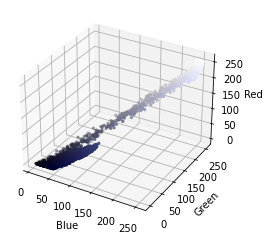

In [38]:
# These libraries provide the functionalities you need for the plot.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
norm = colors.Normalize(vmin = -1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel('Blue')
axis.set_ylabel('Green')
axis.set_zlabel('Red')
plt.show()

In [ ]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors = pixel_colors,
            marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
blue_low = (70, 120, 0)
blue_high = (120, 255, 120)

from matplotlib.colors import hsv_to_rgb

lo_square = np.full((10, 10, 3), blue_low, dtype = np.uint8)/255.0
do_square = np.full((10, 10, 3), blue_high, dtype = np.uint8)/255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1,2,2)
plt.imshow(hsv_to_rgb(lo_square))
plt.show()

In [ ]:
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask = mask)

plt.subplot(1,2,1)
plt.imshow(mask, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(res)
plt.show()